<a href="https://colab.research.google.com/github/manujsinghwal/applied-statistics/blob/main/2.%20data-vizualization/the_bar_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bar Chart
On a bar chart, each bar represents a particular category, and the length of the bar indicates the value or frequency. The longer the bar, the greater the value. All the bars have the same width, which makes it easier to compare them. Bar charts can be drawn either vertically or horizontally.

### 1. Vertical Bar Charts
Vertical bar charts show categories on the horizontal axis, and either
frequency or percentage on the vertical axis. The height of each bar
indicates the value of its category. Here’s an example showing the sales
figures in units for five regions, A, B, C, D, and E:

In [50]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Generating the dataset
df = pd.DataFrame({
    'Region': ['A', 'B', 'C', 'D', 'E'],
    'Sales(Units)': [1000, 5000, 7500, 8000, 9500]
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        5 non-null      object
 1   Sales(Units)  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


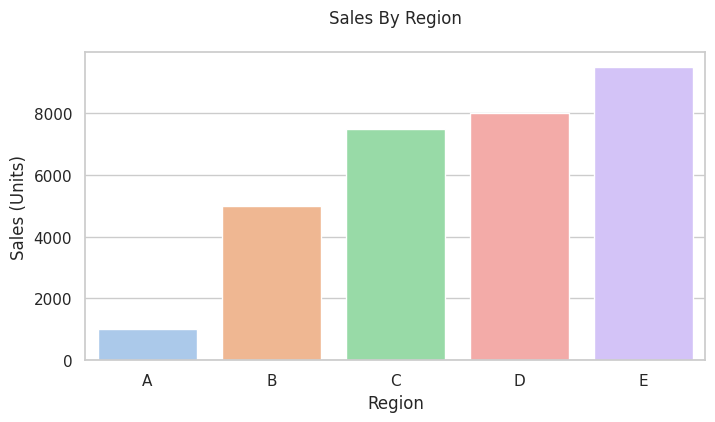

In [52]:
# Creating the bar plot
plt.figure(figsize=(8, 4))  # Set the figure size
sns.barplot(
    data=df,
    x='Region',
    y='Sales(Units)',
    hue='Region',
    palette='pastel',
    legend=False
    )

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Sales (Units)')
plt.title('Sales By Region\n')

# Showing the plot
plt.show()

**Do we want to annonate the Sales(Units) on bars?**
\
Here we go.

In [53]:
# Defining a function to annotating on the bars
def annotating_plot(ax):
  for c in ax.containers:
      labels = []
      for v in c:
        labels.append(int(v.get_height()))
      ax.bar_label(
          c,
          labels=labels,
          label_type='center',
          fontsize=8
          )

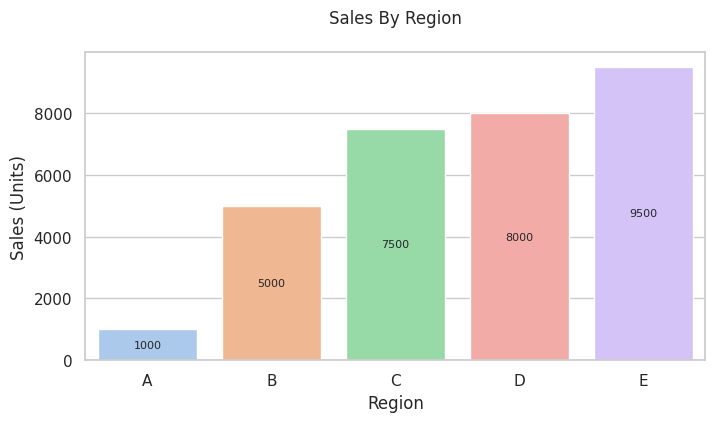

In [54]:
# Creating the bar plot
plt.figure(figsize=(8, 4))  # Set the figure size
ax1 = sns.barplot(
    data=df,
    x='Region',
    y='Sales(Units)',
    hue='Region',
    palette='pastel',
    legend=False
    )

# Annotating on the bars
annotating_plot(ax1)

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Sales (Units)')
plt.title('Sales By Region\n')

# Showing the plot
plt.show()

### 2. Horizontal Bar Charts
Horizontal bar charts are just like vertical bar charts except that the axes are flipped. With horizontal bar charts, we can show the categories on the vertical axis and the frequency or percentage on the horizontal axis.

Vertical bar charts tend to be more common, but horizontal bar charts are useful if the names of your categories are long. They give you lots of space for showing the name of each category without having to turn the bar labels sideways.

Let's take an example and understands the horizontal bar charts:

In [55]:
# Generating the dataset
df1 = pd.DataFrame({
    'Genre': ['Sports', 'Strategy', 'Action', 'Shooter', 'Other'],
    'SatisfiedPlayers': [25000, 10000, 5000, 2500, 1000]
})

df1['DissatisfiedPlayers'] = df1['SatisfiedPlayers'].sum() - df1['SatisfiedPlayers']
df1['%Satisfied'] = df1['SatisfiedPlayers'] * 100.0 / df1['SatisfiedPlayers'].sum()

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Genre                5 non-null      object 
 1   SatisfiedPlayers     5 non-null      int64  
 2   DissatisfiedPlayers  5 non-null      int64  
 3   %Satisfied           5 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 288.0+ bytes


In [56]:
# Defining a function to annotate the bars
def annotating_plot_horizontal(ax):
    for c in ax.containers:
        labels = []
        for v in c:
            labels.append(int(v.get_width()))  # Using get_width() for horizontal bars
        ax.bar_label(
            c,
            labels=labels,
            label_type='center',
            fontsize=8
            )

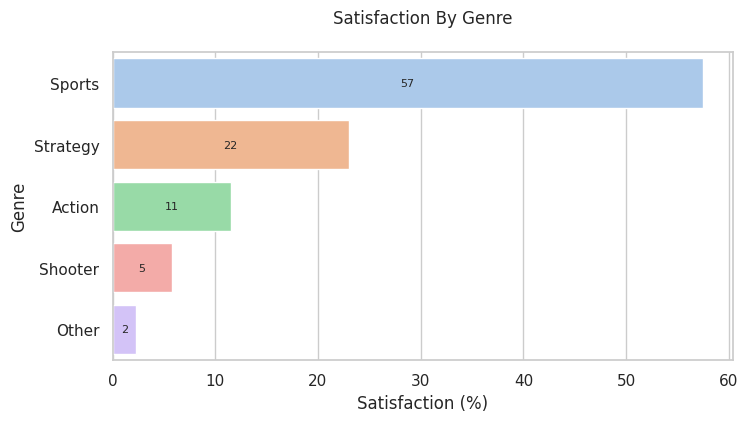

In [57]:
# Creating the bar plot
plt.figure(figsize=(8, 4))  # Set the figure size
ax2 = sns.barplot(
    data=df1,
    x='%Satisfied',
    y='Genre',
    hue='Genre',
    palette='pastel',
    legend=False
    )

# Annotating on the bars
annotating_plot_horizontal(ax2)

# Adding labels and title
plt.xlabel('Satisfaction (%)')
plt.ylabel('Genre')
plt.title('Satisfaction By Genre\n')

# Showing the plot
plt.show()

### The Problem With Above Graph:
There’s just one problem, it doesn’t tell us how many players there are for each genre. This may not sound important, but it means that we have no idea whether this reflects the views of all players, some of them, or even just a handful. So, what we can do now, we can use frequency scale.

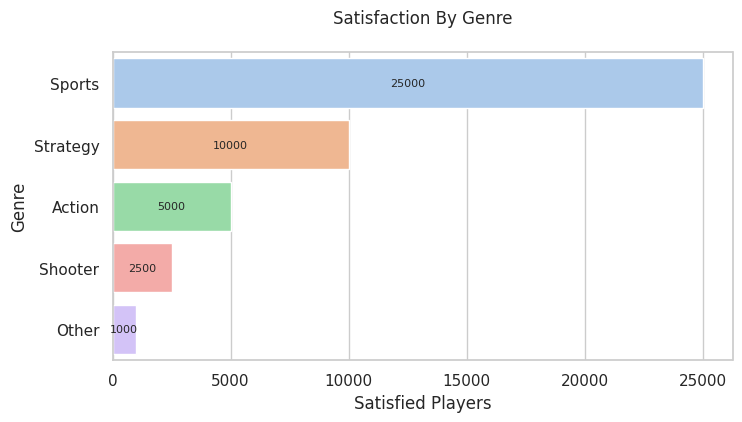

In [58]:
# Creating the bar plot
plt.figure(figsize=(8, 4))  # Set the figure size
ax3 = sns.barplot(
    data=df1,
    x='SatisfiedPlayers',
    y='Genre',
    hue='Genre',
    palette='pastel',
    legend=False
    )

# Annotating on the bars
annotating_plot_horizontal(ax3)

# Adding labels and title
plt.xlabel('Satisfied Players')
plt.ylabel('Genre')
plt.title('Satisfaction By Genre\n')

# Showing the plot
plt.show()

The above chart reflects how many players are satisfied rather than a percentage. But the problem with these bar charts is that they show either the number of satisfied players or the percentage, and they only show satisfied players. But what about dissatisfied players?

### Dealing With Multiple Set Of Data:
With bar charts, it’s actually really easy to show more than one set of data on the same chart. As an example, we can show both the frequency of satisfied players and the frequency of dissatisfied players on the same chart.

**1. Cluster Bar Chart:**
\
Using one bar for the frequency of satisfied players and another for those dissatisfied, for each genre. This sort of chart is useful if we want to compare frequencies, but it’s difficult to see proportions and percentages. This chart is also know as split-category bar chart.

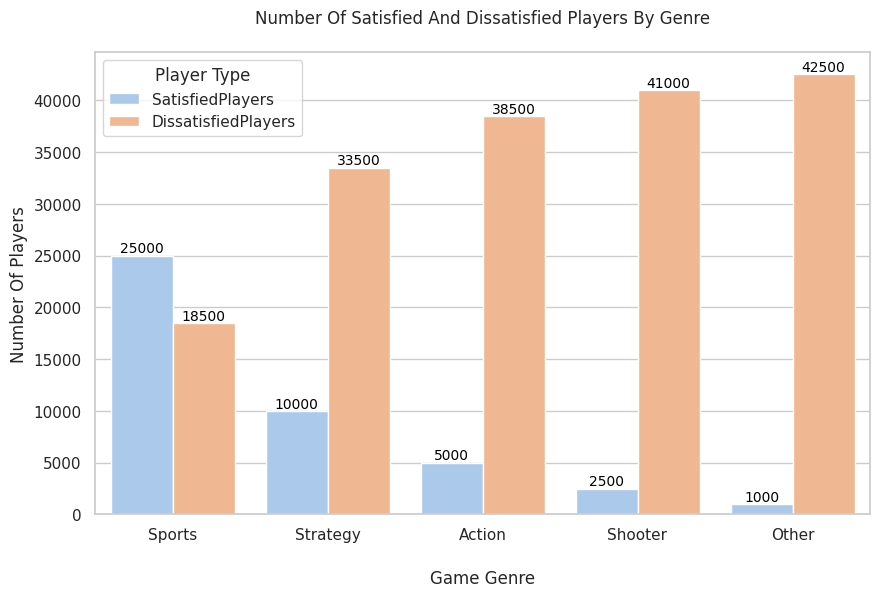

In [59]:
# Melting the required columns
df_melted = df1.melt(
    id_vars='Genre',
    value_vars=['SatisfiedPlayers', 'DissatisfiedPlayers'],
    var_name='PlayerType',
    value_name='Count'
    )

# Creating the cluster bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax4 = sns.barplot(
    x='Genre',
    y='Count',
    hue='PlayerType',
    data=df_melted,
    palette='pastel'
    )
plt.title('Number Of Satisfied And Dissatisfied Players By Genre\n')
plt.ylabel('Number Of Players')
plt.xlabel('\nGame Genre')
plt.legend(title='Player Type')

# Annotate the bars
for p in ax4.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is positive
        ax4.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center',
            xytext=(0, 5),  # Offset the text by 5 points above the bar
            textcoords='offset points',
            fontsize=10,
            color='black'
        )

plt.show()

2. **Stack Bar Chart:**
\
For this chart, we can use one bar for each category, but we need to split the bar proportionally. The overall length of the bar reflects the total frequency. This is also known as segmented bar chart.

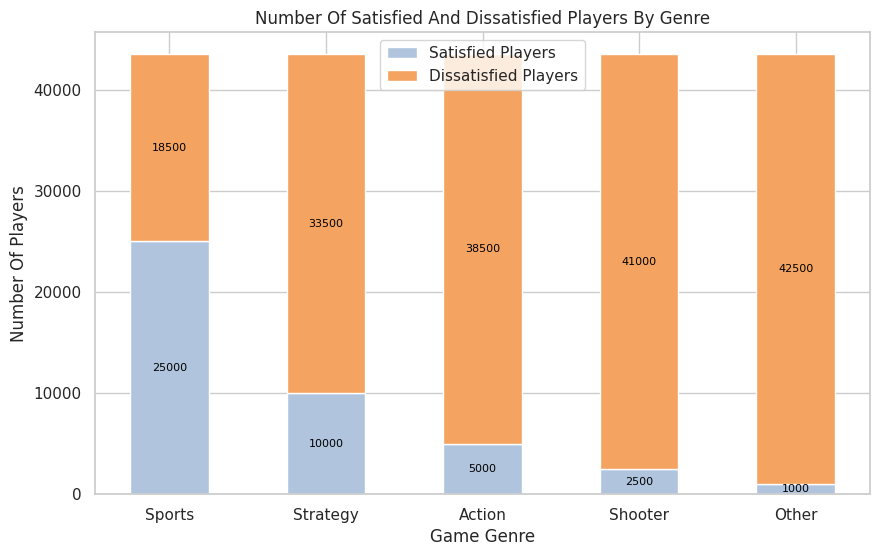

In [60]:
# Defining bar width
bar_width = 0.5

# Defining positions of the bars on the x-axis
r = range(len(df1['Genre']))

# Creating the bar plots
plt.figure(figsize=(10, 6))

bar1 = plt.bar(
              r,
              df1['SatisfiedPlayers'],
              color='lightsteelblue',
              edgecolor='white',
              width=bar_width,
              label='Satisfied Players'
              )
bar2 = plt.bar(
              r,
              df1['DissatisfiedPlayers'],
              bottom=df1['SatisfiedPlayers'],
              color='sandybrown',
              edgecolor='white',
              width=bar_width,
              label='Dissatisfied Players'
              )

# Adding labels
plt.xlabel('Game Genre')
plt.ylabel('Number Of Players')
plt.title('Number Of Satisfied And Dissatisfied Players By Genre')

# Adding xticks on the middle of the group bars
plt.xticks(r, df1['Genre'])

# Annonating the bars
# Annotate percentages on top of the bars
for i, (idx, row) in enumerate(df1.iterrows()):
    # Annotate Satisfied Players
    plt.text(i, row['SatisfiedPlayers'] / 2, row['SatisfiedPlayers'], ha='center', va='center', fontsize=8, color='black')
    # Annotate Dissatisfied Players
    plt.text(i, row['SatisfiedPlayers'] + row['DissatisfiedPlayers'] / 2, row['DissatisfiedPlayers'], ha='center', va='center', fontsize=8, color='black')

# Creating legend & show graphic
plt.legend()
plt.show()